<a href="https://colab.research.google.com/github/KenMuriuki/Knn-and-Naive-Bayes-model-Prediction/blob/master/Kennedy_Muriuki_Week_9_Independent_Project_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Model Prediction

## Defining the Question

### a) Specifying the Data Analytic Question

> The RMS Titanic was a British made luxury ship that was owned by White Star company and built by Belfast shipbuilding firm Harland and Wolff. The ship set asail its maiden voyage from England to New York with 1300 passangers and 900 crew. At 11.40 PM, the ship struck an iceberg and at approximately 2.20 AM, the ship sunk dissapearing beneath the Atlantic ocean. Apporximately 1500 people were killed comprised of 700 crew members. Out of the 710 3rd class members, only 174 survived. This research study aims to explore the factors that led to one surviving or not. It aims to create a model that predicts if a passanger survived or not using given variables.

### b) Defining the Metric for Success

> The metric for this model will be the f1 score. The target score will be 90%.

### d) Recording the Experimental Design

> This study will follow the following life cycle:

*   Defining the question
*   Reading the data
*   Checking the data
*   EDA
*   Implimenting the solution
*   Challenging the solution
*   Follow up questions





## Importing libraries

In [1]:
# loading the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the Data

In [2]:
# Loading the csv datasets 

train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

## Checking the Data

In [ ]:
# Determining the no. of records in our train dataset

train.shape

(891, 12)

In [ ]:
# Determining the no. of records in our test dataset

test.shape

(418, 11)

In [ ]:
# Previewing the top of our train dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the top of our test dataset

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the bottom of our train dataset

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Previewing the bottom of our test dataset

test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Checking whether each column has an appropriate datatype
#
print(train.info())

print('\n**********************************************************\n')

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

**********************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------------

In [ ]:
# checking a brief description of the training dataset.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Tidying the Dataset

### a) Completeness

In [4]:
# checking if there is any missing values in the train dataset
train.isnull().values.any()

True

In [5]:
# cheking the missing values in the train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# replacing the age column with the mean age
train['Age'] = train['Age'].fillna((train['Age'].mean()))

# dropping the cabin column
train.drop('Cabin', axis=1, inplace=True)

# filling forward the missing values on column embarked
train['Embarked'].fillna(method='ffill', inplace=True)

# checking the missing values again
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

The data contains missing values in columns age, cabin and embarked. I decided to drop the column cabin since it had very little information. The column Age wil be replaced with the mean age of the travellers and embarked will be forward filled.

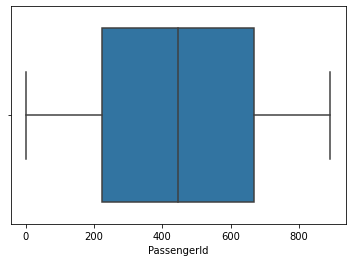

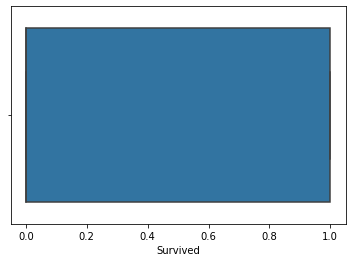

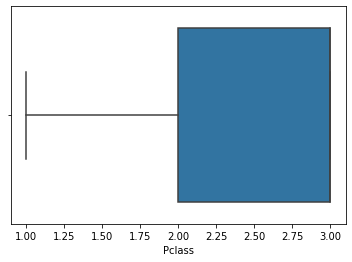

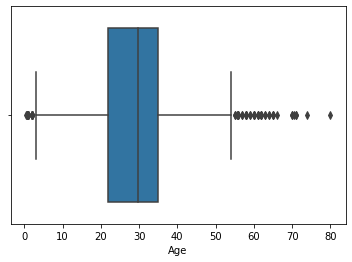

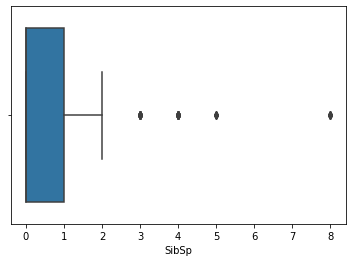

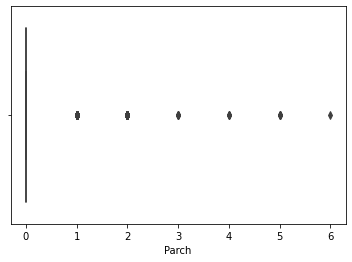

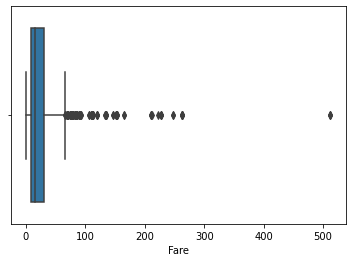

In [ ]:
# Checking for Outliers
# splitting the data into numerical columns
num_col = ['PassengerId',	'Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare']
for col in num_col:
  plt.figure()
  sns.boxplot(x=col, data=train)

There were a lot of outliers in certain columns like Fare and Perch. The Fare column will have outliers since in the Titanic had special staterooms charging up to 20 times the fare of those in first class. There are a lot of outliers in Parch and SibSp column. I decided not to remove the outliers since there will be a lot of information that will be lost and the dataset is limited to only a few entries.

### b) Consistency

In [ ]:
# cheking for duplicates in the dataset
train.duplicated().sum()

0

In [ ]:
# More data cleaning procedures
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# dropping the columns that are not needed 
train_clean = train.drop(train[['PassengerId','Name','Ticket']], axis=1)

# export it as a csv file
train_clean.to_csv('train_clean.csv')

I dropped the columns that are not needed and proceeded to EDA.

## Exploratory Analysis

To run the EDA, I decided to use AutoViz to run the visualization due to limited time. I also used Sweet Viz to generate some statistics.

Shape of your Data Set: (891, 9)
Classifying variables in data set...
    9 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Could not draw Violin Plot
Time to run AutoViz (in seconds) = 1.939


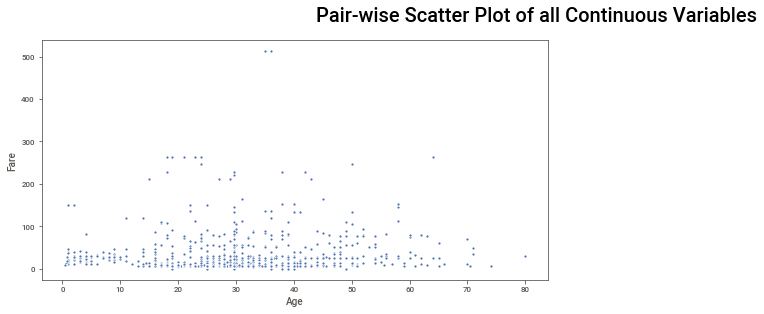

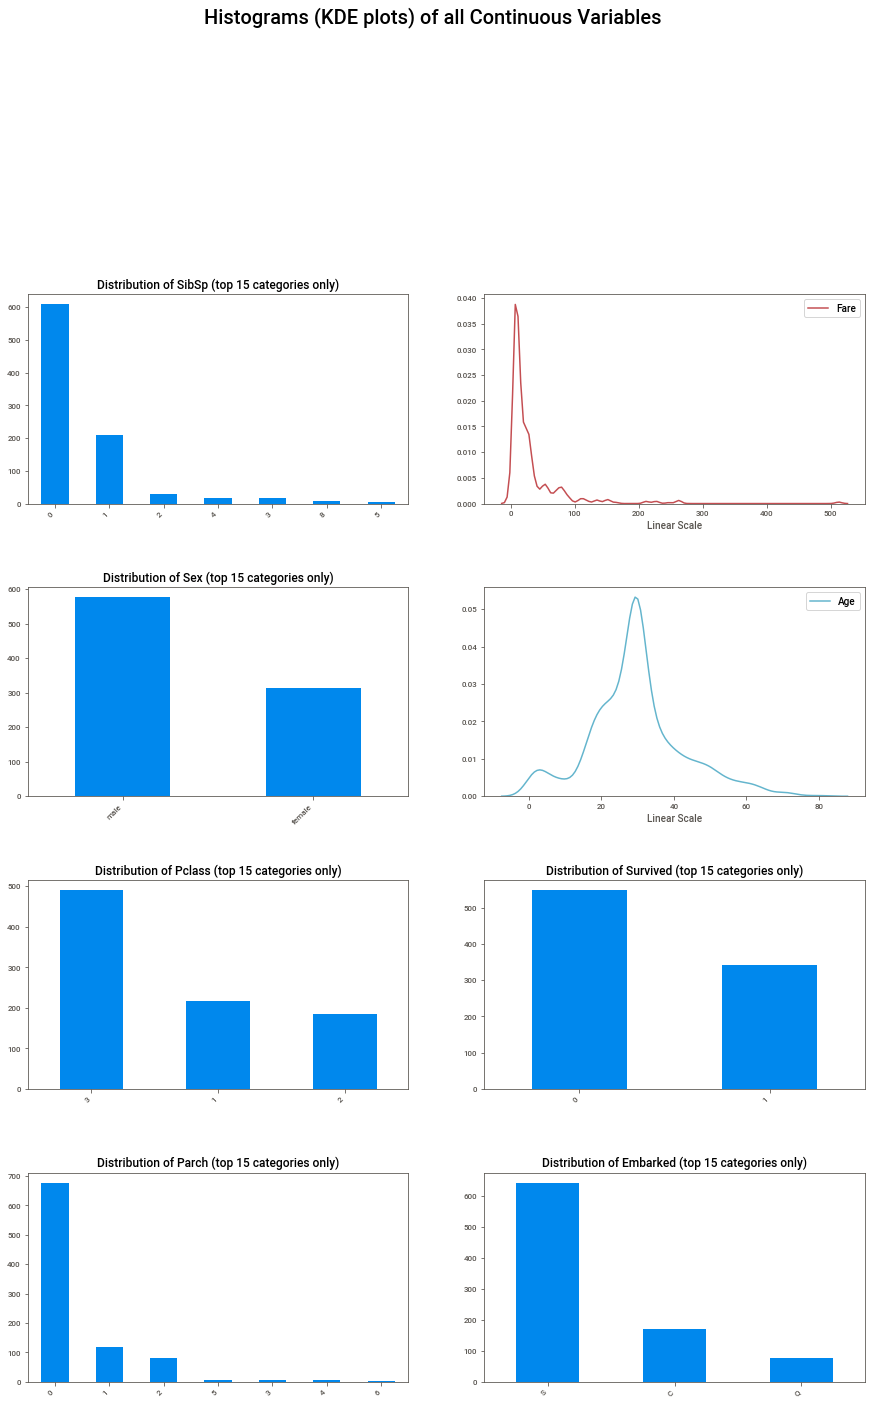

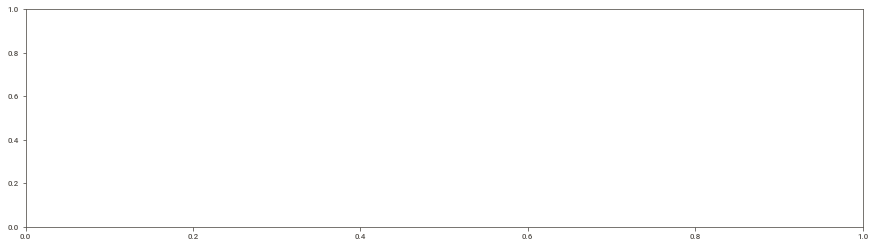

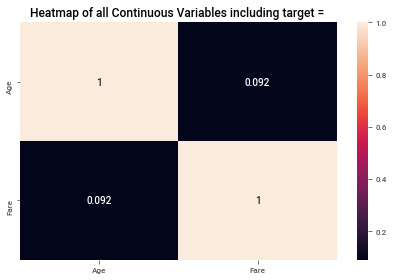

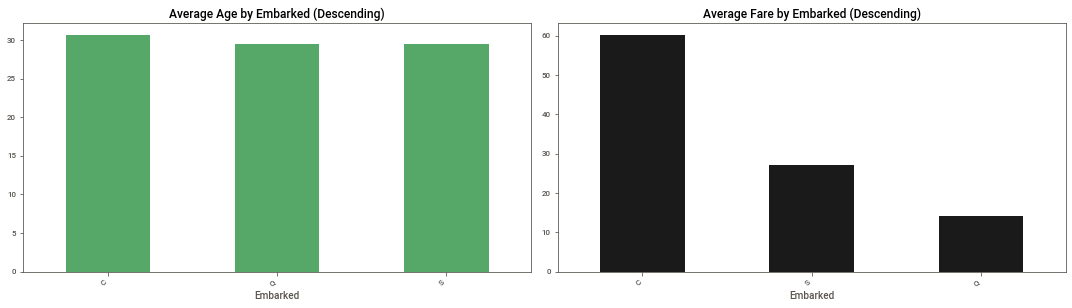

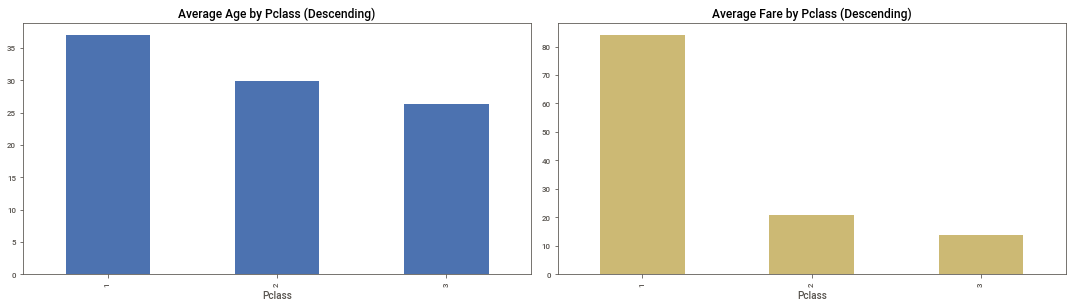

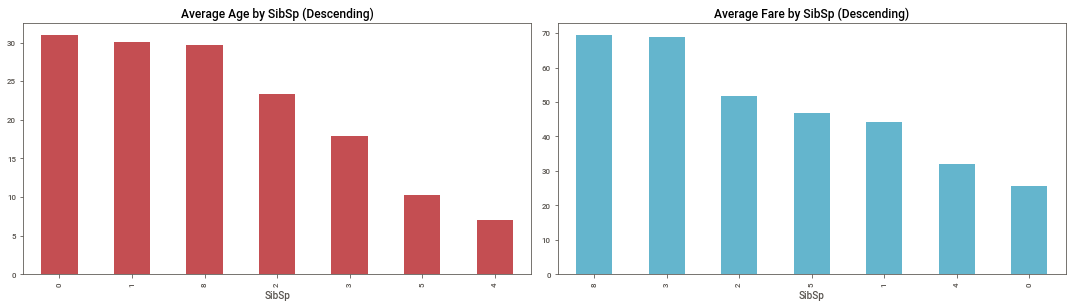

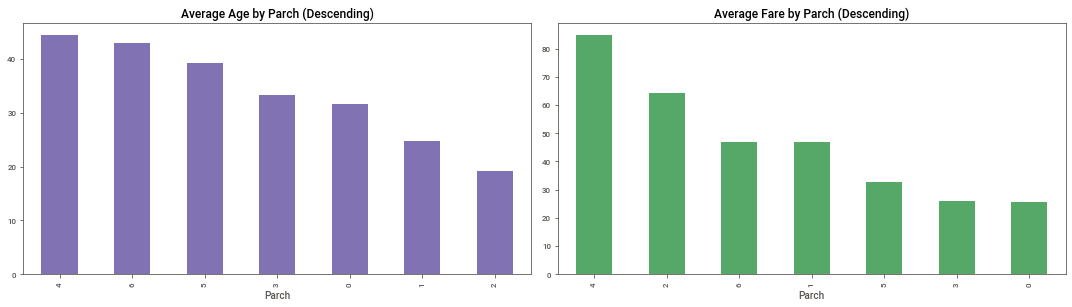

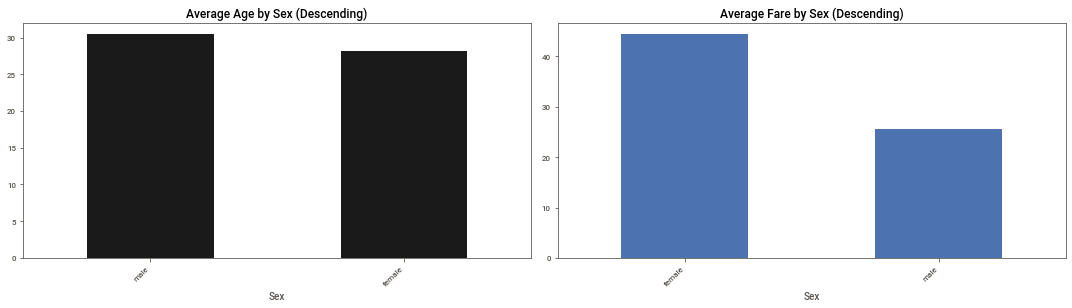

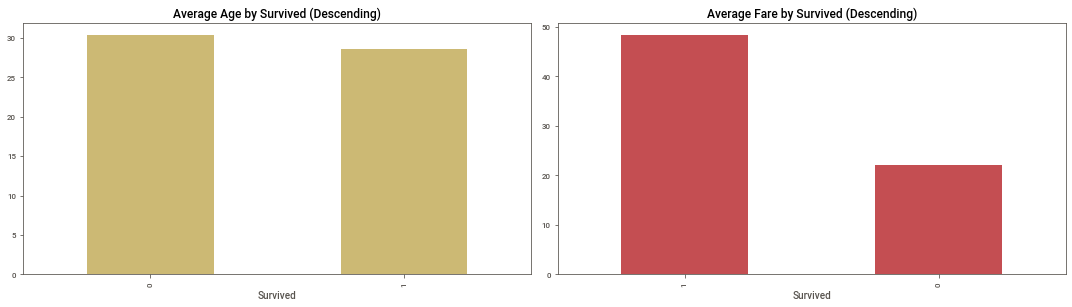

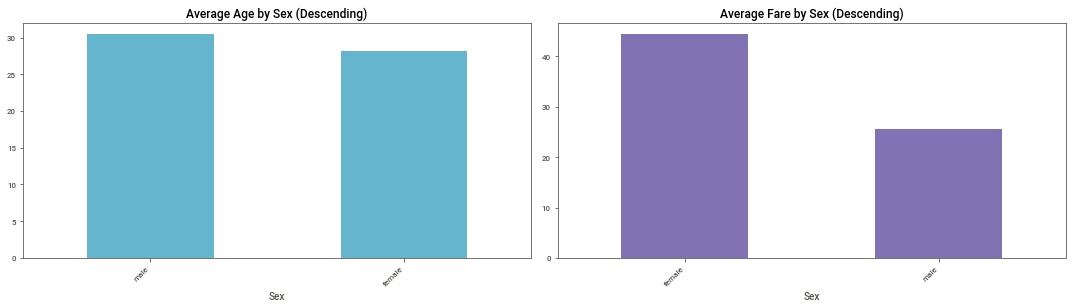

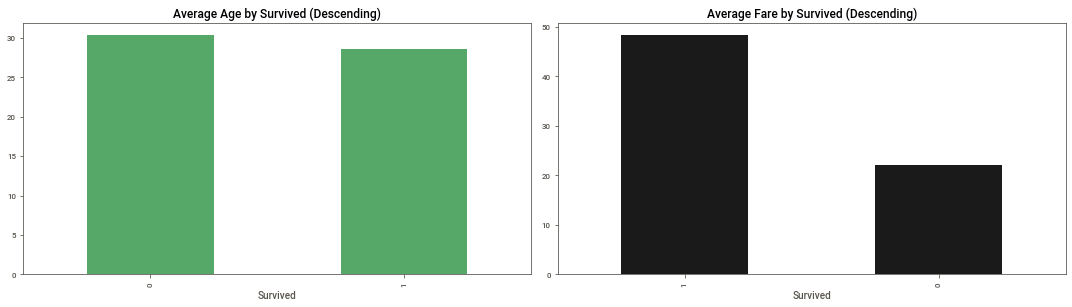

In [ ]:
# generating the visualizations using AutoViz

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
viz = AV.AutoViz('train_clean.csv')

In [ ]:
# generating the sweetviz report and storing it as a html document
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(train_clean)
sweet_report.show_html('sweet_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.



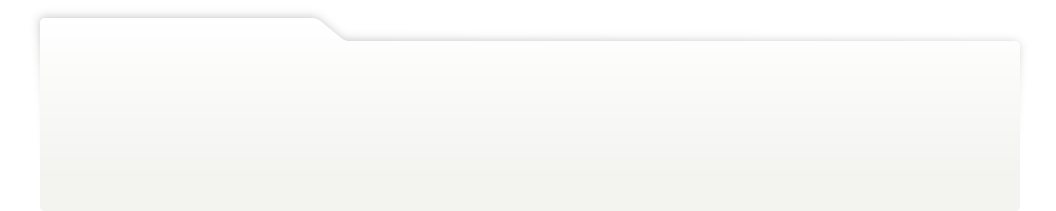
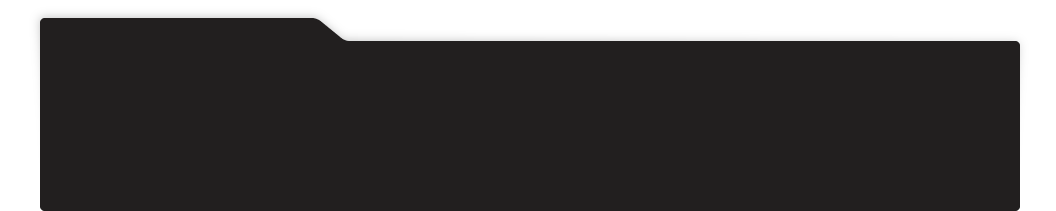
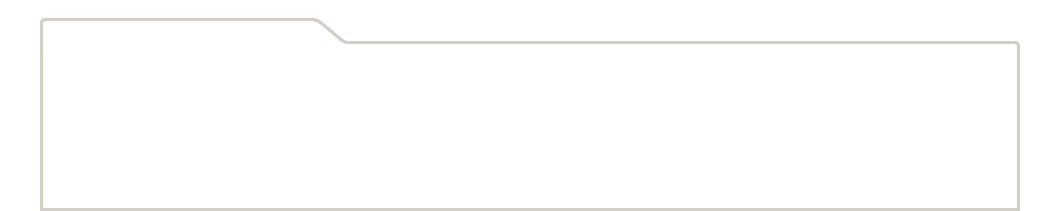
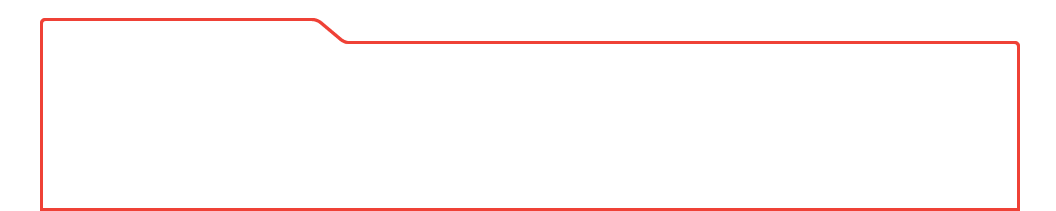
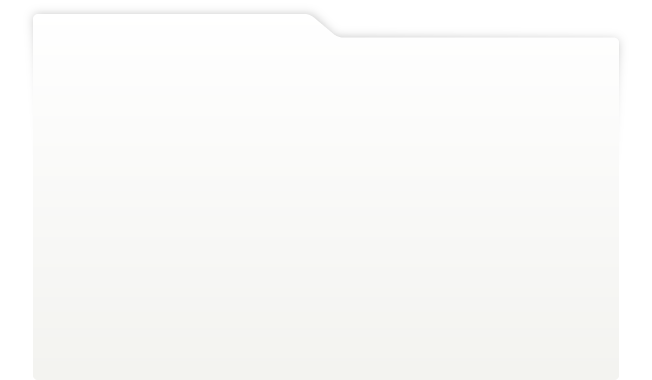
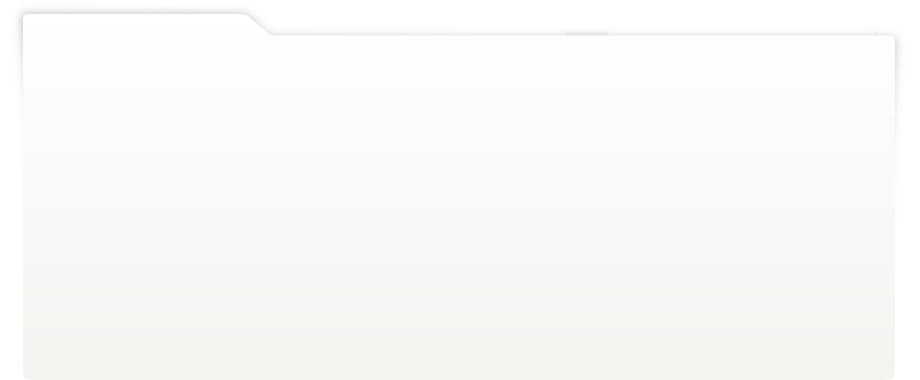
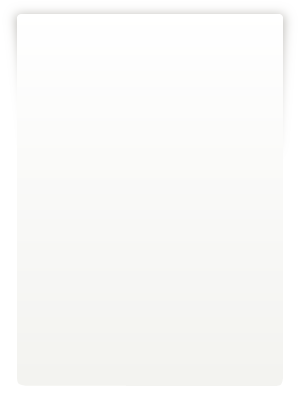
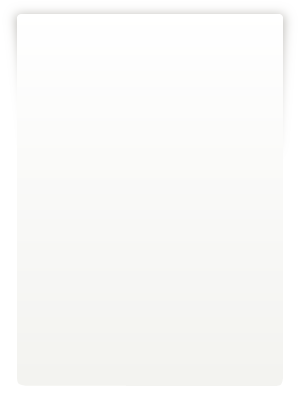
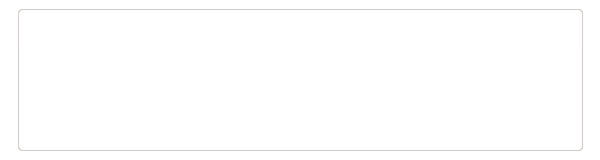
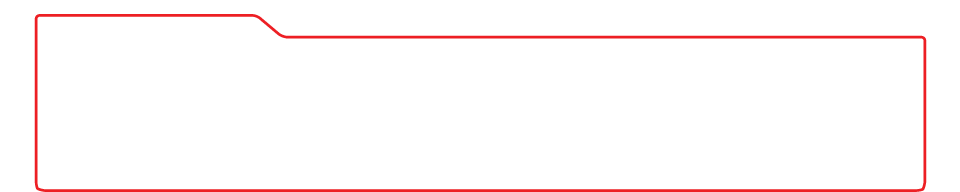
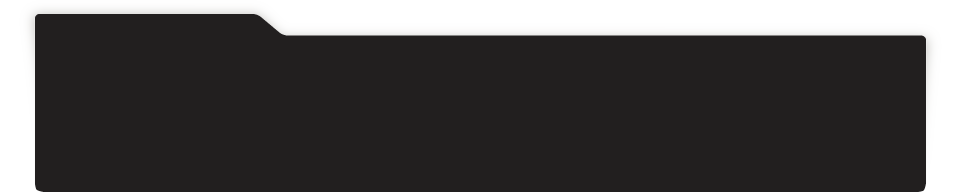
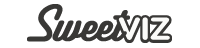
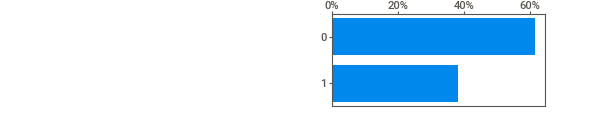
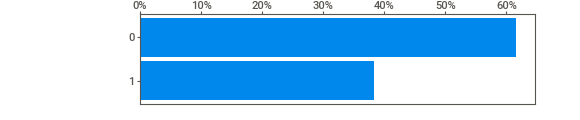
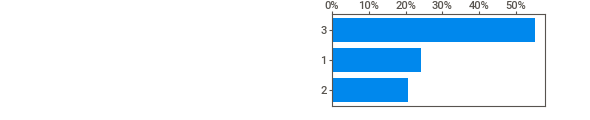
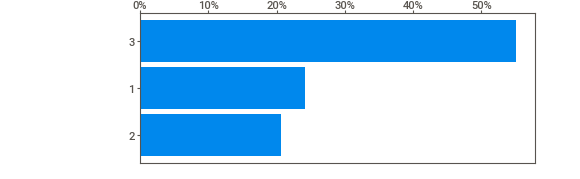
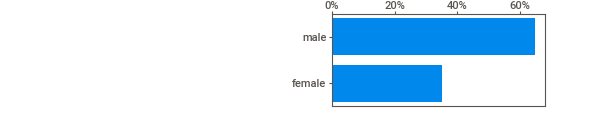
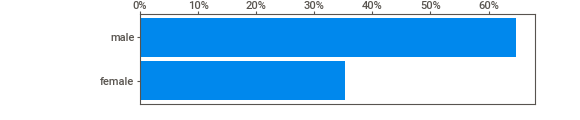
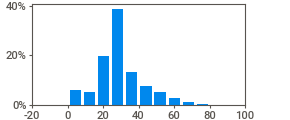
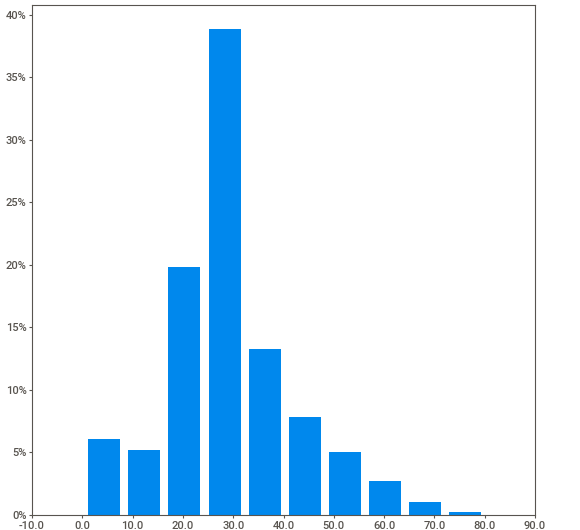
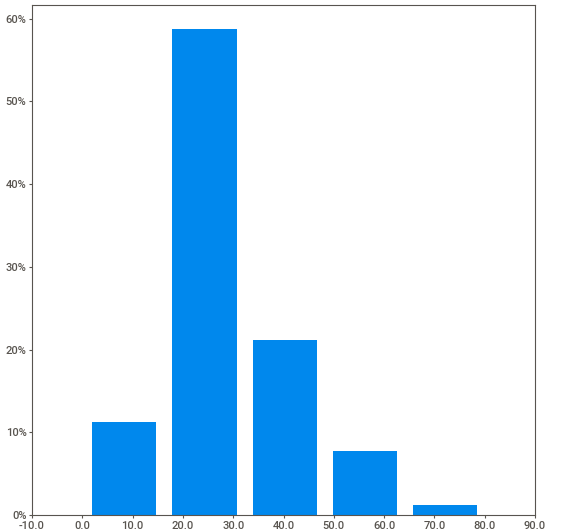
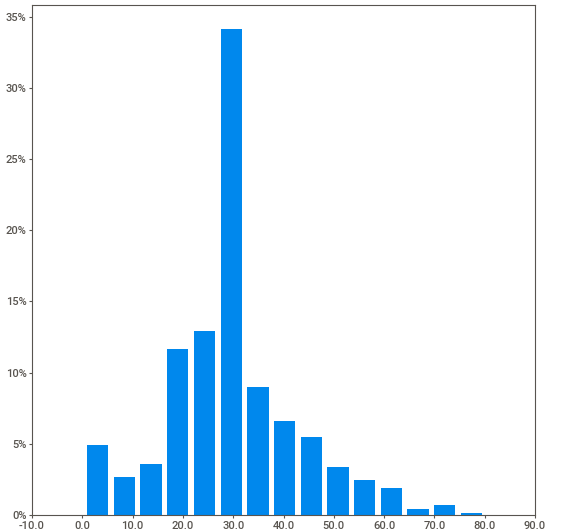
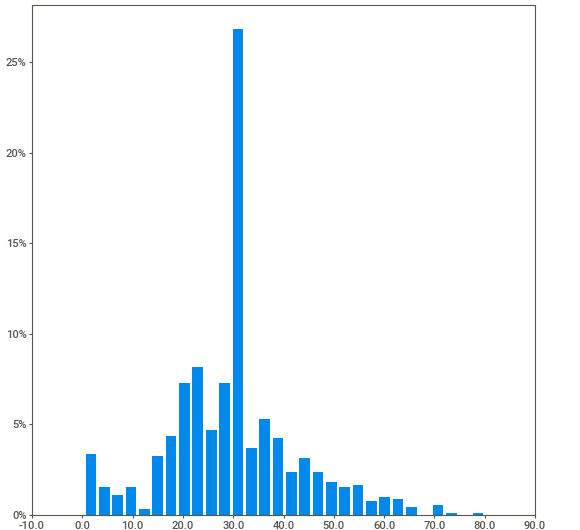
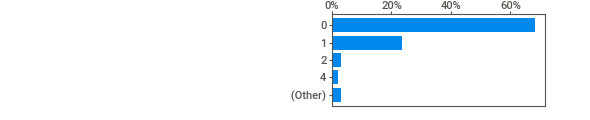
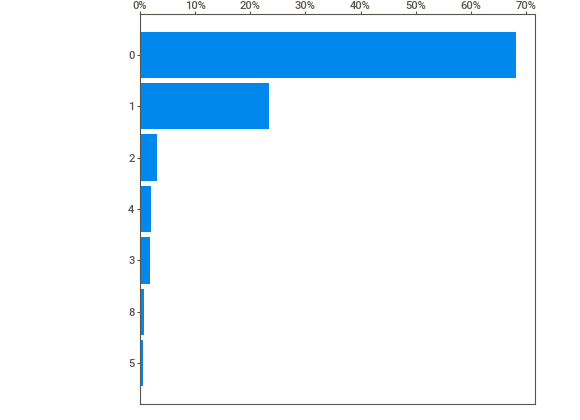
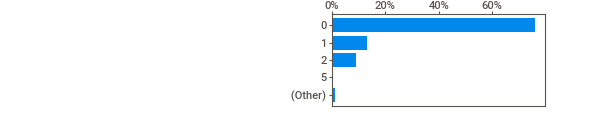
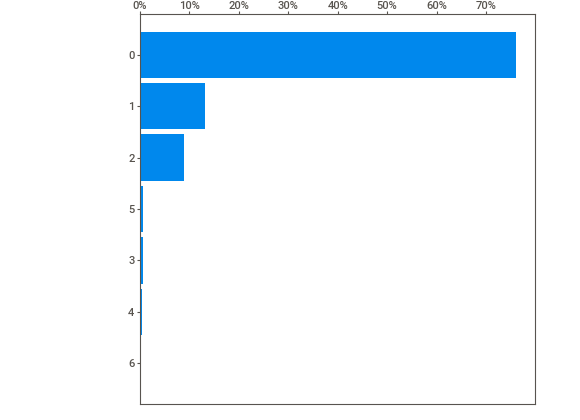
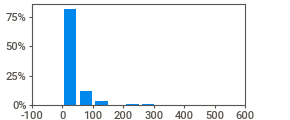
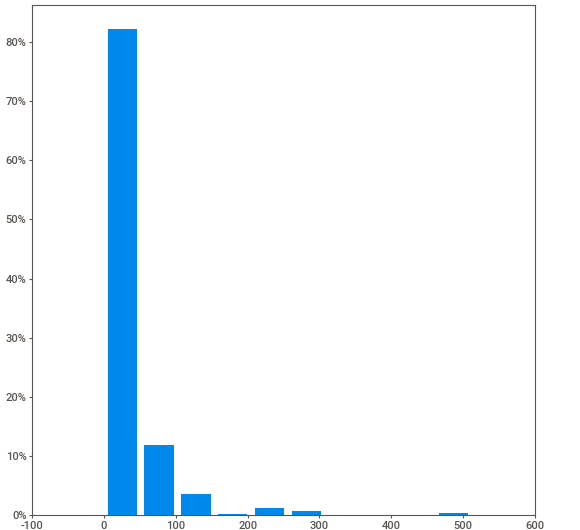
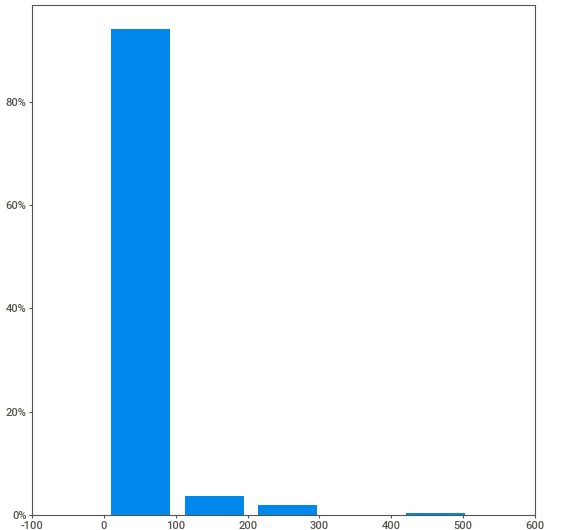
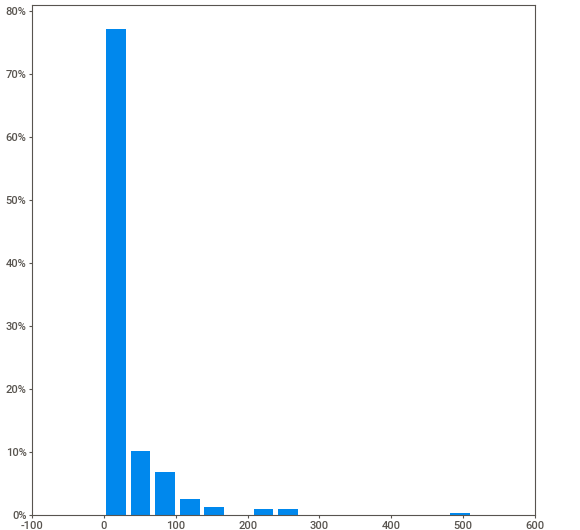
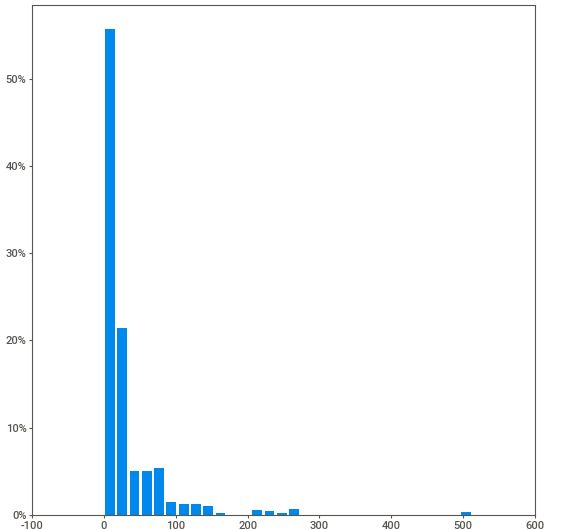
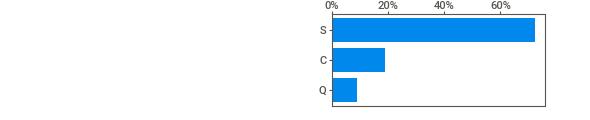
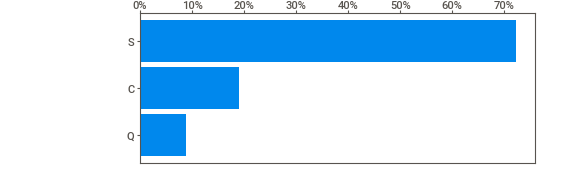
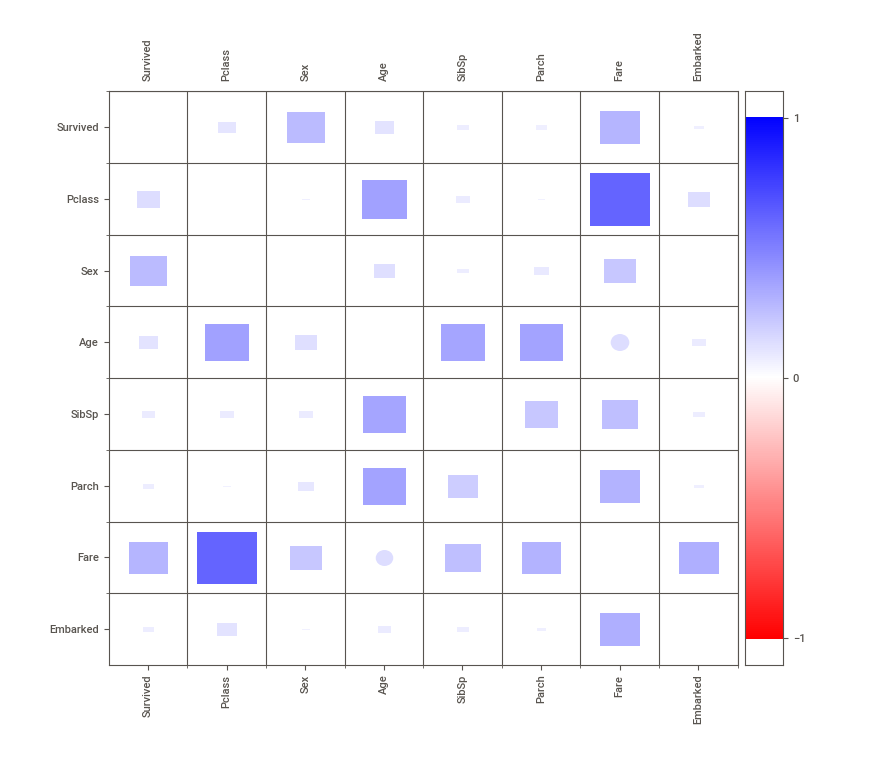
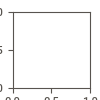

In [ ]:
# reading the Sweetviz html document so as to be able to report the findings
import IPython
IPython.display.HTML(filename='sweet_report.html')

The results of the AutoEDA is as follows:

1. The Sibsp and Fare column are positively skewed. 
2. The sex column has two classses with male having the highest frequency at close to 600 and females more than 300.
3. Age has a line graph looking like a bell shape therefore follows a normal distribution.
4. In the passanger class column, most passangers from the Titanic were from the 3rd class with the least of the passangers coming from 1st class.
5. Most passangers travelled alone without family/children. The highest number of families that passangers travelled with were 1 family member, followed by 2 family members.
6. Most passangers who embarked on the maiden voyage boarded the Titanic from Southhampton, England with the least passangers on the voyage boarded from Queenstown in Ireland. 
7. Of the passangers in the Titanic, the men had the highest average age as compared to women.
8. The female passangers paid an average higher amount of fare than their male counterparts.
9. The average amount of fare paid by passengers who survived was higher than that of passengers who did not survive. Therefore you were likely to survive if you paid a higher amount of fare.
10. The average age of passengers who did not surive was higher than that of passengers who survived. Therefore you were likely survive if you were of a young age.

## Data Processing

Encoding the train dataset to be able to run the ML algorithm using get dummies.

In [5]:
# encoding the embarked column using get_dummies()
train_enc = pd.get_dummies(train_clean, drop_first=True)

train_enc

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [ ]:
# checking on the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# checking the missing values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# filling the missing values of column age with their mean
test['Age'] = test['Age'].fillna(test['Age'].mean())

# filling the missing value of column fare with the mean
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

# dropping the columns that are not needed
test_clean = test.drop(test[['PassengerId','Name','Ticket','Cabin']], axis=1)

# encoding the new dataframe
test_enc = pd.get_dummies(test_clean, drop_first=True)

# checking how the new dataframe looks
test_enc.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [7]:
test_enc.isnull().values.any()

False

Test dataset was also pre-processed for testing of the ML model. There were a few missing values. The missing values in columns of Age and fare were filled with their mean while the column Cabin was dropped because it had a lot of missing values. Finally I encoded the categorical columns in the testing dataset.

## Implementing the Solution

In [18]:
# splitting the datasets into x and y
y = train_enc['Survived']
x = train_enc.drop('Survived', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
classifier = KNeighborsClassifier(n_neighbors=3)
model = classifier.fit(x_train, y_train)
y_pred = model.predict(test_enc.iloc[:179,:])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54 56]
 [27 42]]
              precision    recall  f1-score   support

           0       0.67      0.49      0.57       110
           1       0.43      0.61      0.50        69

    accuracy                           0.54       179
   macro avg       0.55      0.55      0.53       179
weighted avg       0.57      0.54      0.54       179



In [19]:
# cross validating the model using 10 folds
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
print(accuracy.mean())

0.8090962441314554


In [20]:
# hyperparameter tuning using gridsearch
grid_param = {
    'n_neighbors': [3, 5, 7, 9, 13, 15, 17, 19, 21, 23, 25],
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(x_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'n_neighbors': 9}
0.8160602503912363


Using a test size of 20%, the model was run and produced an accuracy of 54%. Therefore I decided to crossvalidate the model using 10 folds and found the best split to have an accuracy of 80.9%. Therefore I conducted a grid search to obtain the best estimators and find the best results. The parameter that I would be testing will be different values of n_neighbors. The best number of n_neighbors to use is 9 bringing the model accuracy to 81.6%, an improvement from the cross validated model.

In [21]:
# running the model with a 0.3 testing size
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
classifier = KNeighborsClassifier(n_neighbors=3)
model = classifier.fit(x_train, y_train)
y_pred = model.predict(test_enc.iloc[:268,:])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[80 88]
 [44 56]]
              precision    recall  f1-score   support

           0       0.65      0.48      0.55       168
           1       0.39      0.56      0.46       100

    accuracy                           0.51       268
   macro avg       0.52      0.52      0.50       268
weighted avg       0.55      0.51      0.51       268



In [22]:
# cross validating the model using 10 folds
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
print(accuracy.mean())

0.808858166922683


In [23]:
# hyperparameter tuning using gridsearch
grid_param = {
    'n_neighbors': [3, 5, 7, 9, 13, 15, 17, 19, 21, 23, 25],
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(x_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'n_neighbors': 7}
0.8121863799283154


When the test size is increased to 30%, the model perfoms worse that that of 20% test size. However this is improved by crossvalidatin the model using 10 folds and conducting a grid search. The best estimator for the n_neighbors is 7 with a model accuracy of 81.2%. 

In [24]:
# Using a 0.4 testing size
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
classifier = KNeighborsClassifier(n_neighbors=3)
model = classifier.fit(x_train, y_train)
y_pred = model.predict(test_enc.iloc[:357,:])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106 115]
 [ 59  77]]
              precision    recall  f1-score   support

           0       0.64      0.48      0.55       221
           1       0.40      0.57      0.47       136

    accuracy                           0.51       357
   macro avg       0.52      0.52      0.51       357
weighted avg       0.55      0.51      0.52       357



In [25]:
# cross validating the model using 10 folds
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
print(accuracy.mean())

0.797728860936408


In [26]:
# hyperparameter tuning using gridsearch
grid_param = {
    'n_neighbors': [3, 5, 7, 9, 13, 15, 17, 19, 21, 23, 25],
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(x_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'n_neighbors': 7}
0.8127882599580714


The model using a 40% test size had the same accuracy as using 30% but had a lower accuracy that that of 20%. The model performed the same as the previous model after cross validating a tuning the parameter.

I decided to investigate the accuracies of the models at different test sizes, starting from a test size of 0.1 all the way to a test size of 0.9.

In [50]:
# checking the accuracies of the model in different splits
accuracy = []
range = np.arange(0.1,1,0.1)

for i in range:
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=i, random_state=0)
  model = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy_ = f1_score(y_test, y_pred)
  accuracy.append(accuracy_)
  print('The accuracy for test size ', i, 'is ', str(accuracy_))

The accuracy for test size  0.1 is  0.6376811594202899
The accuracy for test size  0.2 is  0.6271186440677967
The accuracy for test size  0.30000000000000004 is  0.5595238095238095
The accuracy for test size  0.4 is  0.5462555066079295
The accuracy for test size  0.5 is  0.5288135593220339
The accuracy for test size  0.6 is  0.5414364640883977
The accuracy for test size  0.7000000000000001 is  0.5416666666666665
The accuracy for test size  0.8 is  0.5678571428571428
The accuracy for test size  0.9 is  0.5723577235772358


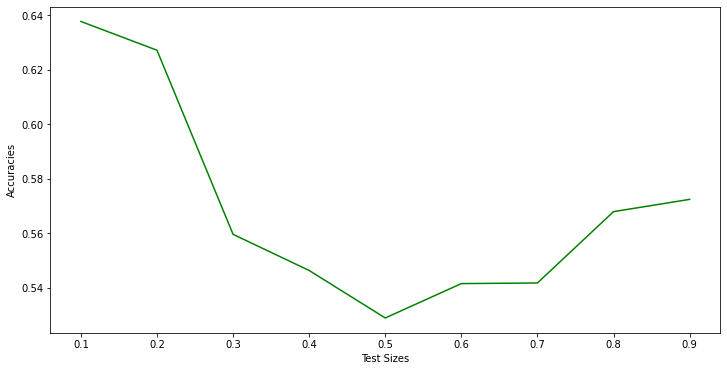

In [51]:
# visualizing the f_scores 
plt.figure(figsize=(12,6))
plt.plot(range,accuracy, color='green')
plt.xticks(range)
plt.xlabel('Test Sizes')
plt.ylabel('Accuracies')
plt.show()

The graph shows a test size of 0.1 gave the model the highest accuracy with the accuracy going down till a 50% test size. It then increased to have an accuracy of 58% using a 90% test size.

## Feature Selection Using LDA

To obtain a good model, I decided to carry out feature selection of the features and selct the best 5 features of the model. Then I will fit the features in the model and use the ideal test size obtained(in this case I will use 0.2 since I feel like 0.1 is too small) and run the model. I will then cross validate the model using 10 folds.

In [47]:
# conducting feature selection using LDA 
y = train_enc['Survived']
x = train_enc.drop('Survived', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 5)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# training the model
classifier = KNeighborsClassifier(n_neighbors=15)
model = classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[101   9]
 [ 24  45]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [48]:
# cross validating the model using 10 folds
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
print(accuracy.mean())

0.8202073552425665


In [49]:
# hyperparameter tuning using gridsearch
grid_param = {
    'n_neighbors': [3, 5, 7, 9, 13, 15, 17, 19, 21, 23, 25],
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(x_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'n_neighbors': 17}
0.820226917057903


The model was able to obtain its highest accuracy of 82%. This is the highest accuracy I have been able to obtain using the KNearestNeighbor.

## Challenging the solution

> The model built could be improved by conducting feature engineering. A threshold of the numerical columns could be established to deem if for example the fare was expensive, averagely priced or cheap. The algorithm would predict better with there variables and therefore obtain better results and insights.
>The range of the parameter n_neighbors could be increased to test more values of the n-neighbors to find the optimal number of neighbors to use.






## Follow up questions

### a). Did we have the right data?

> We definitely have the right data. This is the original dataset that was collected from the passengers of the Titanic.

### b). Do we need other data to answer our question?

> We probably could use more data entries for the better ferfomance of the model. However the major limitation of the data is that this is the only dataset that was collected and no more information of the Titanic passangers has been avaliable since then.

### c). Did we have the right question?

> Definitely. The question looking into the factors that contributed to a passanger surviving is the right question since this was the center stage of the debate around the Titanic and its sinking.